<p style="font-size:300%;font-family:Source Sans Pro;text-align:center;line-height:50px;">Final Project<br>TOP 200 MUSIC CHARTS ANALYS </p>

## Table of Content:  
1. [Data collection](#1.-Data-collection)  
2. [Exploring data](#2.-Exploring-data)  
    a. [Number of rows and columns?](#a.-Number-of-rows-and-columns?)  
    b. [Are there any duplicate rows?](#b.-Are-there-any-duplicate-rows?)  
    c. [Meaning of each columns](#c.-Meaning-of-each-columns)  
    d. [What is the datatype of each column? Are there any columns with datatypes that are not suitable for further processing?](#d.-What-is-the-datatype-of-each-column?-Are-there-any-columns-with-datatypes-that-are-not-suitable-for-further-processing?)  
    e. [Preprocessing](e.-Preprocessing)   
    f. [Distribution](#f.-Distribution)  
3. [Asking meaningfull questions?](#3.-Asking-meaningfull-questions?)  
4. [Preprocessing + analyzing data to answer each question](#4.-Preprocessing-+-analyzing-data-to-answer-each-question)  
5. [Reflection](#5.-Reflection)  
6. [Reference](#6.-Reference)  

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# 1. Data collection

**Subject:** Spotify Top 200 Charts (2020-2021)  
**Source:** [Kaggle](www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021)  
**Author's consent & License:** This dataset was uploaded onto Kaggle by [SASHANK PILLAI](www.kaggle.com/sashankpillai) with ***Data files © Original Authors*** license.  
**Author data collection method:** This dataset would not be possible without the help of [Spotify charts](spotifycharts.com) and [Spotipy Python Library](https://spotipy.readthedocs.io/en/2.22.0/).  

# 2. Exploring data

In [2]:
df = pd.read_csv('spotify_dataset.csv')
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


We can see a redundant column `Index` **&rarr; So, We can set it as index**.  
Additionally, we can modify name columns name (replace blank space, convert to lowercase) for further analyzation to be more convinient.

In [3]:
def modifyColumnsName(x):
    res = x.replace('(', '')
    res = res.replace(')', '')
    res = res.replace(' ', '_')
    res = res.lower()
    return res

df = df.set_index('Index')
df.index.name = None

df.columns = list(map(lambda _ : modifyColumnsName(_), df.columns.tolist()))
df.head()

,highest_charting_position,number_of_times_charted,week_of_highest_charting,song_name,streams,artist,artist_followers,song_id,genre,release_date,...,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,chord
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


## a. Number of rows and columns?

In [4]:
n_rows, n_cols = df.shape
print(f'Dataset has {n_rows} rows and {n_cols} columns!')

Dataset has 1556 rows and 22 columns!


## b. Are there any duplicate rows? 

In [5]:
any(df.duplicated())

False

There are 11 songs which don't have id, we will process in further step. 

Some songs counted more than once. This is normal because a song may have many versions such as remix, instrument,...

In [6]:
dup_songs = df['song_id'].value_counts()
dup_songs = dup_songs[dup_songs > 1]
dup_songs

                          11
5uEYRdEIh9Bo4fpjDd4Na9     3
4lUmnwRybYH7mMzf16xB0y     2
0oQc0F6KUE7QY7k5TU6bic     2
0e6NlGJxYlHvAN8SKxad7N     2
4ZRrLHqzhGRXYj2qcB4s5S     2
4S2uhQE8L9V6p7rj7SiauJ     2
1WedZeiezCmCEOzLwhx0hV     2
3yZCjDTxzZxx1kll1sRjGc     2
1iQDltZqI7BXnHrFy4Qo1k     2
7ygpwy2qP3NbrxVkHvUhXY     2
4umIPjkehX1r7uhmGvXiSV     2
07Oz5StQ7GRoygNLaXs2pd     2
0GzuHFG4Ql6DoyxFRnIk3F     2
1D3z6HTiQsNmZxjl7F7eoG     2
6uvMKqNlrSvcC4NaKnrwjZ     2
02kDW379Yfd5PzW5A6vuGt     2
2AlYncTpVHKwHb55F9lF6O     2
5VwwpU7KsLhgfbMEecedhJ     2
1SV1fxF65n9NhRHp3KlBuu     2
35UUpTmrcFXNIVIN26ujXl     2
2MbdDtCv5LUVjYy9RuGTgC     2
27RSJHEA99Y0Vsow7nA37A     2
463CkQjx2Zk1yXoBuierM9     2
7wsmIIm0xWmtP7TmACXkJn     2
37BZB0z9T8Xu7U3e65qxFy     2
0t3ZvGKlmYmVsDzBJAXK8C     2
2YpeDb67231RjR0MgVLzsG     2
73O30uMI7n6DuzBmbtO7kC     2
Name: song_id, dtype: int64

## c. Meaning of each columns

The dataset include all the songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The dataset include the following features:

- `Highest Charting Position`: The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Number of Times Charted`: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Week of Highest Charting`: The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Song Name`: Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Song iD`: The song ID provided by Spotify (unique to each song).
- `Streams`: Approximate number of streams the song has.
- `Artist`: The main artist/ artists involved in making the song.
- `Artist Followers`: The number of followers the main artist has on Spotify.
- `Genre`: The genres the song belongs to.
- `Release Date`: The initial date that the song was released.
- `Weeks Charted`: The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Popularity`:The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
- `Danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `Acousticness`: A measure from 0.0 to 1.0 of whether the track is acoustic.
- `Energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- `Liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- `Loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- `Speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- `Tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- `Valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `Chord`: The main chord of the song instrumental.

## d. What is the datatype of each column? Are there any columns with datatypes that are not suitable for further processing?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   highest_charting_position  1556 non-null   int64 
 1   number_of_times_charted    1556 non-null   int64 
 2   week_of_highest_charting   1556 non-null   object
 3   song_name                  1556 non-null   object
 4   streams                    1556 non-null   object
 5   artist                     1556 non-null   object
 6   artist_followers           1556 non-null   object
 7   song_id                    1556 non-null   object
 8   genre                      1556 non-null   object
 9   release_date               1556 non-null   object
 10  weeks_charted              1556 non-null   object
 11  popularity                 1556 non-null   object
 12  danceability               1556 non-null   object
 13  energy                     1556 non-null   object
 14  loudness

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   highest_charting_position  1556 non-null   int64 
 1   number_of_times_charted    1556 non-null   int64 
 2   week_of_highest_charting   1556 non-null   object
 3   song_name                  1556 non-null   object
 4   streams                    1556 non-null   object
 5   artist                     1556 non-null   object
 6   artist_followers           1556 non-null   object
 7   song_id                    1556 non-null   object
 8   genre                      1556 non-null   object
 9   release_date               1556 non-null   object
 10  weeks_charted              1556 non-null   object
 11  popularity                 1556 non-null   object
 12  danceability               1556 non-null   object
 13  energy                     1556 non-null   object
 14  loudness

**We should change dtype of:**
- "release_date" from `str` to `datetime`.  
- "streams", "artist_followers", "popularity" and "duration_(ms)" from `str` to `int`.
- "danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "tempo" and "valence" from `str` to `float`.

---

## e. Preprocessing

### Drop empty values:
With a quick glance, we can relize that this dataframe use **blank** character to replace `NaN` values. Moreover, if a row have one **blank**, almost its others features will be **blank**.

In [9]:
(df.loc[(df.release_date == ' ')] == ' ').sum(axis=0)

highest_charting_position     0
number_of_times_charted       0
week_of_highest_charting      0
song_name                     0
streams                       0
artist                        0
artist_followers             11
song_id                      11
genre                        11
release_date                 11
weeks_charted                 0
popularity                   11
danceability                 11
energy                       11
loudness                     11
speechiness                  11
acousticness                 11
liveness                     11
tempo                        11
duration_ms                  11
valence                      11
chord                        11
dtype: int64

Because there's not so much row, and they've lost most of data **&rarr; Drop it!**

In [10]:
df = df.loc[~(df.release_date == ' ')]
(df == ' ').sum(axis=0)

highest_charting_position    0
number_of_times_charted      0
week_of_highest_charting     0
song_name                    0
streams                      0
artist                       0
artist_followers             0
song_id                      0
genre                        0
release_date                 0
weeks_charted                0
popularity                   0
danceability                 0
energy                       0
loudness                     0
speechiness                  0
acousticness                 0
liveness                     0
tempo                        0
duration_ms                  0
valence                      0
chord                        0
dtype: int64

### Change dtype of "Release Date" to `datetime`

Initially, we can relize that "Release Date" features have `%Y-%m-%d` format. However, do all of them have that format?

In [11]:
pd.unique(df.release_date.apply(lambda x : len(x)))

array([10,  4,  7])

Surprisingly, there are 3 different types:
- 4 character format is `%Y` &rarr; we can suppose it is the first day of first month of this year.
- 7 character format is `%Y-%m` &rarr; we can suppose it is the first day of this month.
- The other is our expectation.

In [12]:
def fillMissingInfoDate(x):
    res = ''
    if len(x) == 4:
        res = x + '-01-01'
    elif len(x) == 7:
        res = x + '-01'
    else:
        res = x
    return res

df.release_date = pd.to_datetime(df.release_date.apply(fillMissingInfoDate), format='%Y-%m-%d')

### Change dtype of "Streams", "Artist_Followers", "Popularity" and "Duration_(ms)" from `str` to `int`.

In [13]:
df.streams = df.streams.str.replace(',', '')
int_features = ['streams', 'artist_followers', 'popularity', 'duration_ms']
df[int_features] = df[int_features].astype('int')

### Change dtype of "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo" and "Valence" from `str` to `float`.

In [14]:
float_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "tempo", "valence"]
df[float_features] = df[float_features].astype('float')

**Check again!**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   highest_charting_position  1545 non-null   int64         
 1   number_of_times_charted    1545 non-null   int64         
 2   week_of_highest_charting   1545 non-null   object        
 3   song_name                  1545 non-null   object        
 4   streams                    1545 non-null   int64         
 5   artist                     1545 non-null   object        
 6   artist_followers           1545 non-null   int64         
 7   song_id                    1545 non-null   object        
 8   genre                      1545 non-null   object        
 9   release_date               1545 non-null   datetime64[ns]
 10  weeks_charted              1545 non-null   object        
 11  popularity                 1545 non-null   int64         
 12  dancea

**&rarr; It's OK!**

## f. Distribution

### Numeric:

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
highest_charting_position,1545.00,87.83,58.13,1.00,37.00,80.00,137.00,200.00
number_of_times_charted,1545.00,10.68,16.39,1.00,1.00,4.00,12.00,142.00
streams,1545.00,6337136.38,3375402.18,4176083.00,4915080.00,5269163.00,6452492.00,48633449.00
artist_followers,1545.00,14716902.87,16675788.51,4883.00,2123734.00,6852509.00,22698747.00,83337783.00
popularity,1545.00,70.09,15.82,0.00,65.00,73.00,80.00,100.00
danceability,1545.00,0.69,0.14,0.15,0.60,0.71,0.80,0.98
energy,1545.00,0.63,0.16,0.05,0.53,0.64,0.75,0.97
loudness,1545.00,-6.35,2.51,-25.17,-7.49,-5.99,-4.71,1.51
speechiness,1545.00,0.12,0.11,0.02,0.05,0.08,0.17,0.88
acousticness,1545.00,0.25,0.25,0.00,0.05,0.16,0.39,0.99


**&rarr; From above dataframe, we can relized there is not any missing values**

### Categorical:

In [17]:
categorical_df = df.select_dtypes(include='O')
categorical_df.describe(include='O').T

,count,unique,top,freq
week_of_highest_charting,1545,83,2019-12-27--2020-01-03,89
song_name,1545,1545,Ghost,1
artist,1545,712,Taylor Swift,52
song_id,1545,1516,5uEYRdEIh9Bo4fpjDd4Na9,3
genre,1545,394,[],75
weeks_charted,1545,771,2020-12-18--2020-12-25,31
chord,1545,12,C#/Db,214


**&rarr; Similarly to numeric, we can easily relize there is not any missing value!**

In [18]:
categorical_diff_val = categorical_df.apply(lambda x : pd.unique(x))
categorical_num_diff_val = categorical_df.nunique()

pd.DataFrame([categorical_num_diff_val, categorical_diff_val], index=['number of different values', 'different values']).T

,number of different values,different values
week_of_highest_charting,83,"[2021-07-23--2021-07-30, 2021-06-25--2021-07-0..."
song_name,1545,"[Beggin', STAY (with Justin Bieber), good 4 u,..."
artist,712,"[Måneskin, The Kid LAROI, Olivia Rodrigo, Ed S..."
song_id,1516,"[3Wrjm47oTz2sjIgck11l5e, 5HCyWlXZPP0y6Gqq8TgA2..."
genre,394,"[['indie rock italiano', 'italian pop'], ['aus..."
weeks_charted,771,[2021-07-23--2021-07-30\n2021-07-16--2021-07-2...
chord,12,"[B, C#/Db, A, D#/Eb, G#/Ab, F#/Gb, C, D, A#/Bb..."


---

# 3. Asking meaningfull questions?

## Q1: When do people listen to music the most?
Answering it we can detect what is the best time to release music products (album, CD,...) to get maximum profit.

## Q2: What was music trend in this period?
If you are music producer, you can use this answer to know listeners interest, trend from which you can produce music fitted with market in near futures. 

## Q3: How did music change in 2020-2021 period?
Similarly previous question, we can use answer's information for predictting future music. Besides, we can explore mystery of best musics properties and gain common formula of best productions

## Q4: Top artist in each genre from 2020 to 2021?  
Answer above question, there are some benefits:
- If you are a new artist and want to release music to debut with your favorite genre, but you don't know how to make a good product. You can explore the way best artists in your genre play their music.
- Information from the answer can use for recommendation algorithm in media applications

## Q5: Which is better, a solo artist or collab artists?
If you are a artist, should you collab with another artist or solo? Above question's answers will give you exact answer.



---

# 4. Preprocessing + analyzing data to answer each question

## Preprocess for question 1

We will analyze the distribution by month inferred from of songs in highest charting position. We add column `week_of_highest_charting_start` representing for the start day of highest charting position week. We will base on it to infer `month_of_highest_charting_start` by "rule" ***song have start day of highest after 25th be considered belong to next month***

In [19]:
df_dw = df.copy() #copy data frame
df_dw['week_of_highest_charting_start'] = pd.to_datetime(df['week_of_highest_charting'].apply(lambda x : (x.split('--')[0]))) 

In [20]:
#arrange columns
cols = list(df_dw.columns.values)
cols = ['highest_charting_position', 'number_of_times_charted',
       'week_of_highest_charting','week_of_highest_charting_start', 'song_name', 'streams', 'artist',
       'artist_followers', 'song_id', 'genre', 'release_date',
       'weeks_charted', 'popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'liveness', 'tempo',
       'duration_ms', 'valence', 'chord']
df_dw = df_dw[cols]

We decided that it was necessary to delete the lines with duplicates in the Song ID. Because we only consider once occurrence of the song

In [21]:
df_dw.drop_duplicates('song_id', inplace=True)

Apply "rule" to find month of song belong to 

In [22]:
df_dw['month_of_highest_charting_start'] = df_dw['week_of_highest_charting_start'].apply(lambda x : (x + relativedelta(months=1)) if x.day >= 25 else x)
df_dw['month_of_highest_charting_start'] = df_dw['month_of_highest_charting_start'].apply(lambda x : x.strftime('%Y-%m'))

### Q1: When do people listen to music the most

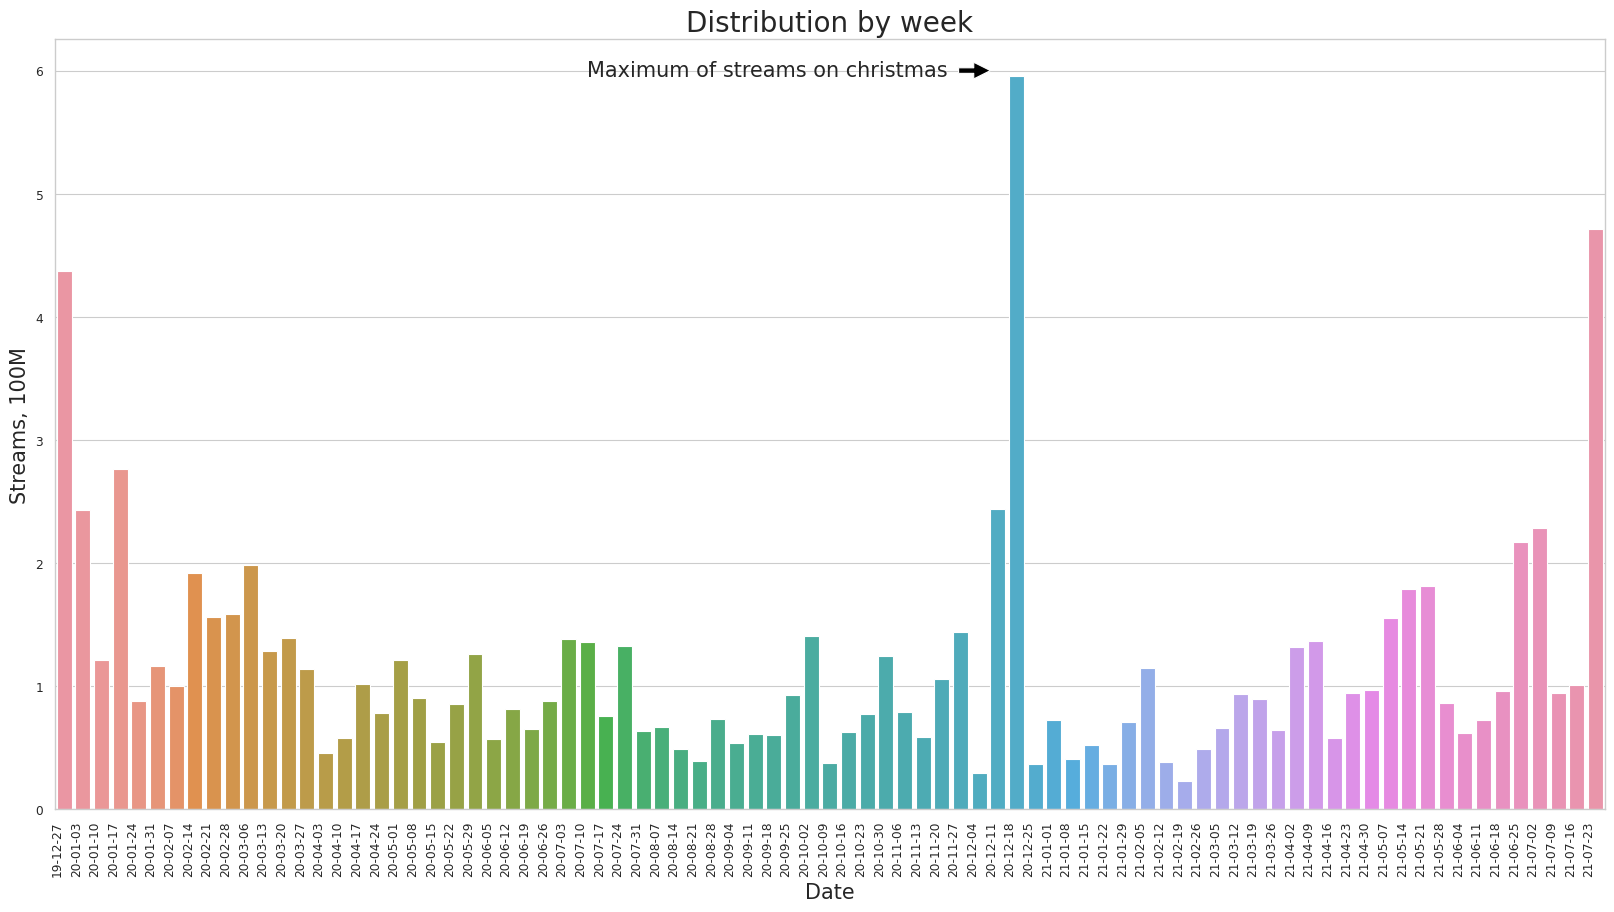

In [23]:
#make easy vision
sns.set_theme(style="whitegrid")
sns.set_context("paper")

#get total streams of each week
y = df_dw.groupby(by=['week_of_highest_charting_start'])['streams'].sum()
x = y.index

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=x, y=y/100000000, data=y, order=y)
ax.axes.set_title('Distribution by week',size=20)

x_dates = x.strftime('%y-%m-%d').sort_values() #reformat date

ax.set_ylabel('Streams, 100M', size=15)
ax.set_xlabel('Date', size=15)
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')

#add notice to peak
ax.annotate('Maximum of streams on christmas',
            xy=(50, 6), xycoords='data',
            xytext=(-50, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='center',
            arrowprops=dict(facecolor='black', shrink=0.15), size=15)

fig.show()

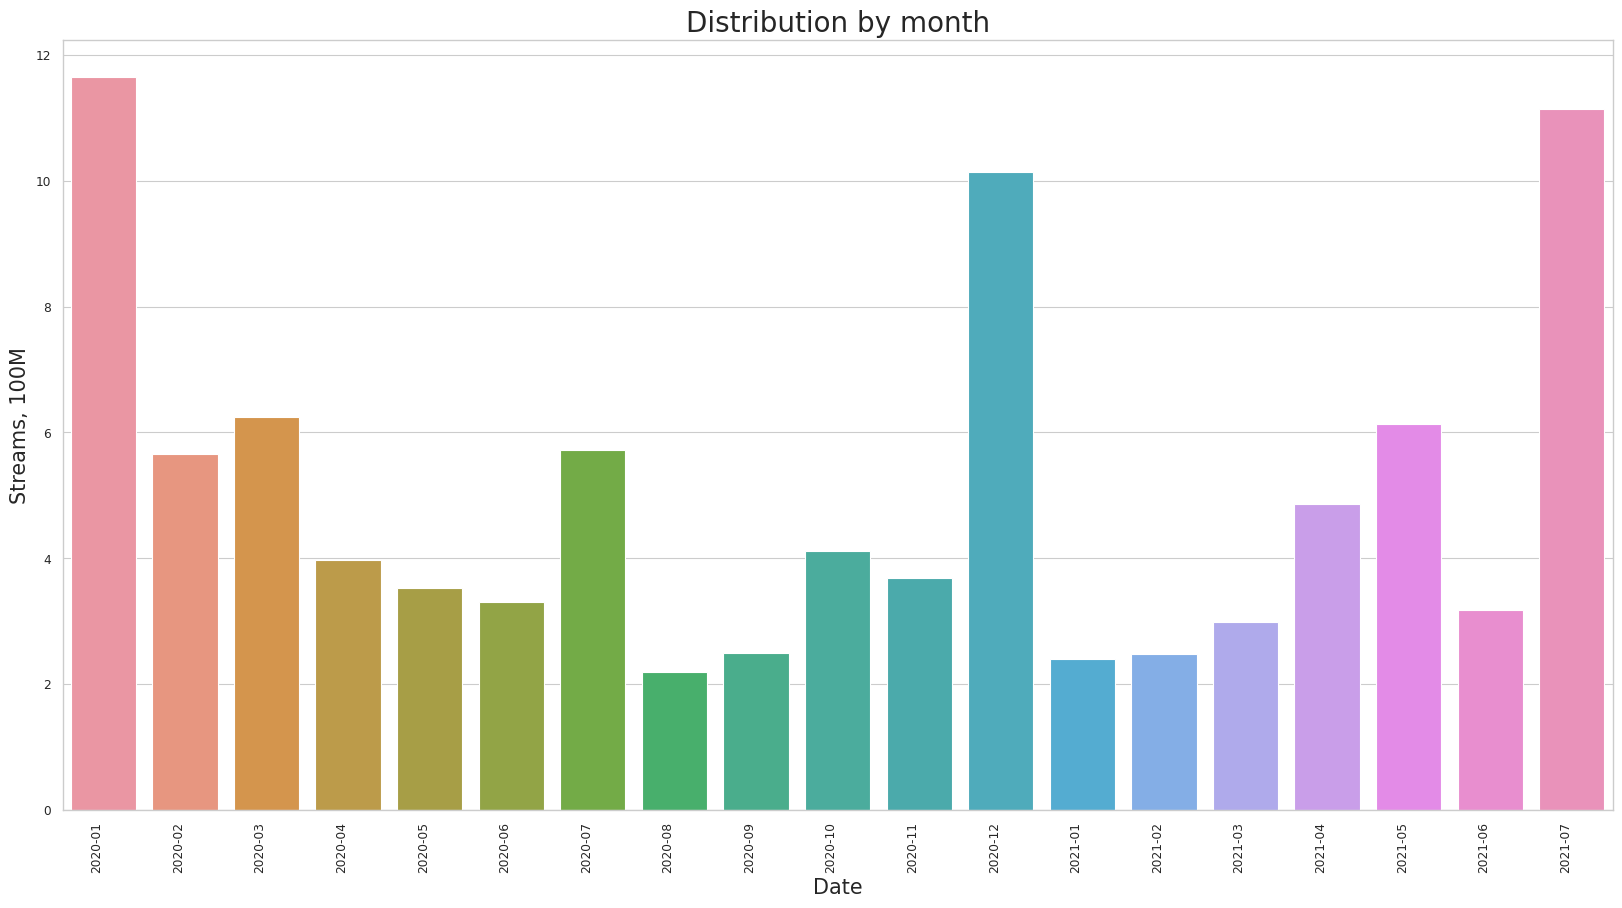

In [24]:
#make easy vision
sns.set_theme(style="whitegrid")
sns.set_context("paper")

#get total streams of each week
y = df_dw.groupby(by=['month_of_highest_charting_start'])['streams'].sum()
x = y.index

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=x, y=y/100000000, data=y, order=y)
ax.axes.set_title('Distribution by month',size=20)

x_dates = x.sort_values() #reformat date

ax.set_ylabel('Streams, 100M', size=15)
ax.set_xlabel('Date', size=15)
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')

fig.show()

What music theme is most listened to on this occasion?

In [25]:
df_dw[df_dw['week_of_highest_charting_start'] == "2020-12-18"][['week_of_highest_charting_start','song_name']].sample(n=50)

,week_of_highest_charting_start,song_name
689,2020-12-18,Christmas Tree Farm
661,2020-12-18,Like It's Christmas
675,2020-12-18,"Baby, It's Cold Outside"
674,2020-12-18,The Christmas Song (Shawn Mendes & Camila Cabe...
647,2020-12-18,Santa Baby
641,2020-12-18,A Holly Jolly Christmas - Single Version
659,2020-12-18,My Only Wish (This Year)
663,2020-12-18,You Make It Feel Like Christmas (feat. Blake S...
656,2020-12-18,Christmas Lights
690,2020-12-18,Cozy Little Christmas


&rarr; Most songs are about Chirstmax!

From above bar chart and table, we can conclude:
- Most of highest bars tell we that people listening to music in December. We can easily relize that is Christmas and New year - the worlds wide holidays.
- Although there are most streams in December, you should not release music products on this occasion except Christmas/New year concept music. There is a fact that people just love listenning Chirstmax songs on this occsion, so there is no change for your new music.
- However, in more detail look, we can relize July has more streams than usual. Therefore, we can consider this time for releasing new musics.

---
## Preprocessing for question 2

- Because "week_charted" have multiple week **&rarr; We should `explode` it**.  
- We will add "start_week_charted" to represent its time.  
- Additionally, we will add "year" column for comparing between years. However, a song can stand on chart in both 2020 and 2021 **&rarr; So we also `explode` it**

In [26]:
song_properties = ['weeks_charted', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'tempo', 'valence', 'duration_ms']
song_properties_df = df.loc[:, song_properties]

song_properties_df.weeks_charted = song_properties_df.weeks_charted.apply(lambda x : x.split('\n'))
song_properties_byweek_df = song_properties_df.explode('weeks_charted')
song_properties_byweek_df['start_week_charted'] = pd.to_datetime(song_properties_byweek_df.weeks_charted.apply(lambda x : (x.split('--')[0])))

def getYearOnBoard(weeks_on_chart):
    start = datetime.strptime(weeks_on_chart[-1].split('--')[0], '%Y-%m-%d')
    end = datetime.strptime(weeks_on_chart[0].split('--')[1], '%Y-%m-%d')
    years = [start.year] if start.year == end.year else [start.year, end.year]
    
    return years

song_properties_df['year'] = song_properties_df.weeks_charted.apply(getYearOnBoard)
song_properties_byyear_df = song_properties_df.explode('year')

## Q2: How did music properties change in the 2020-2021 period?

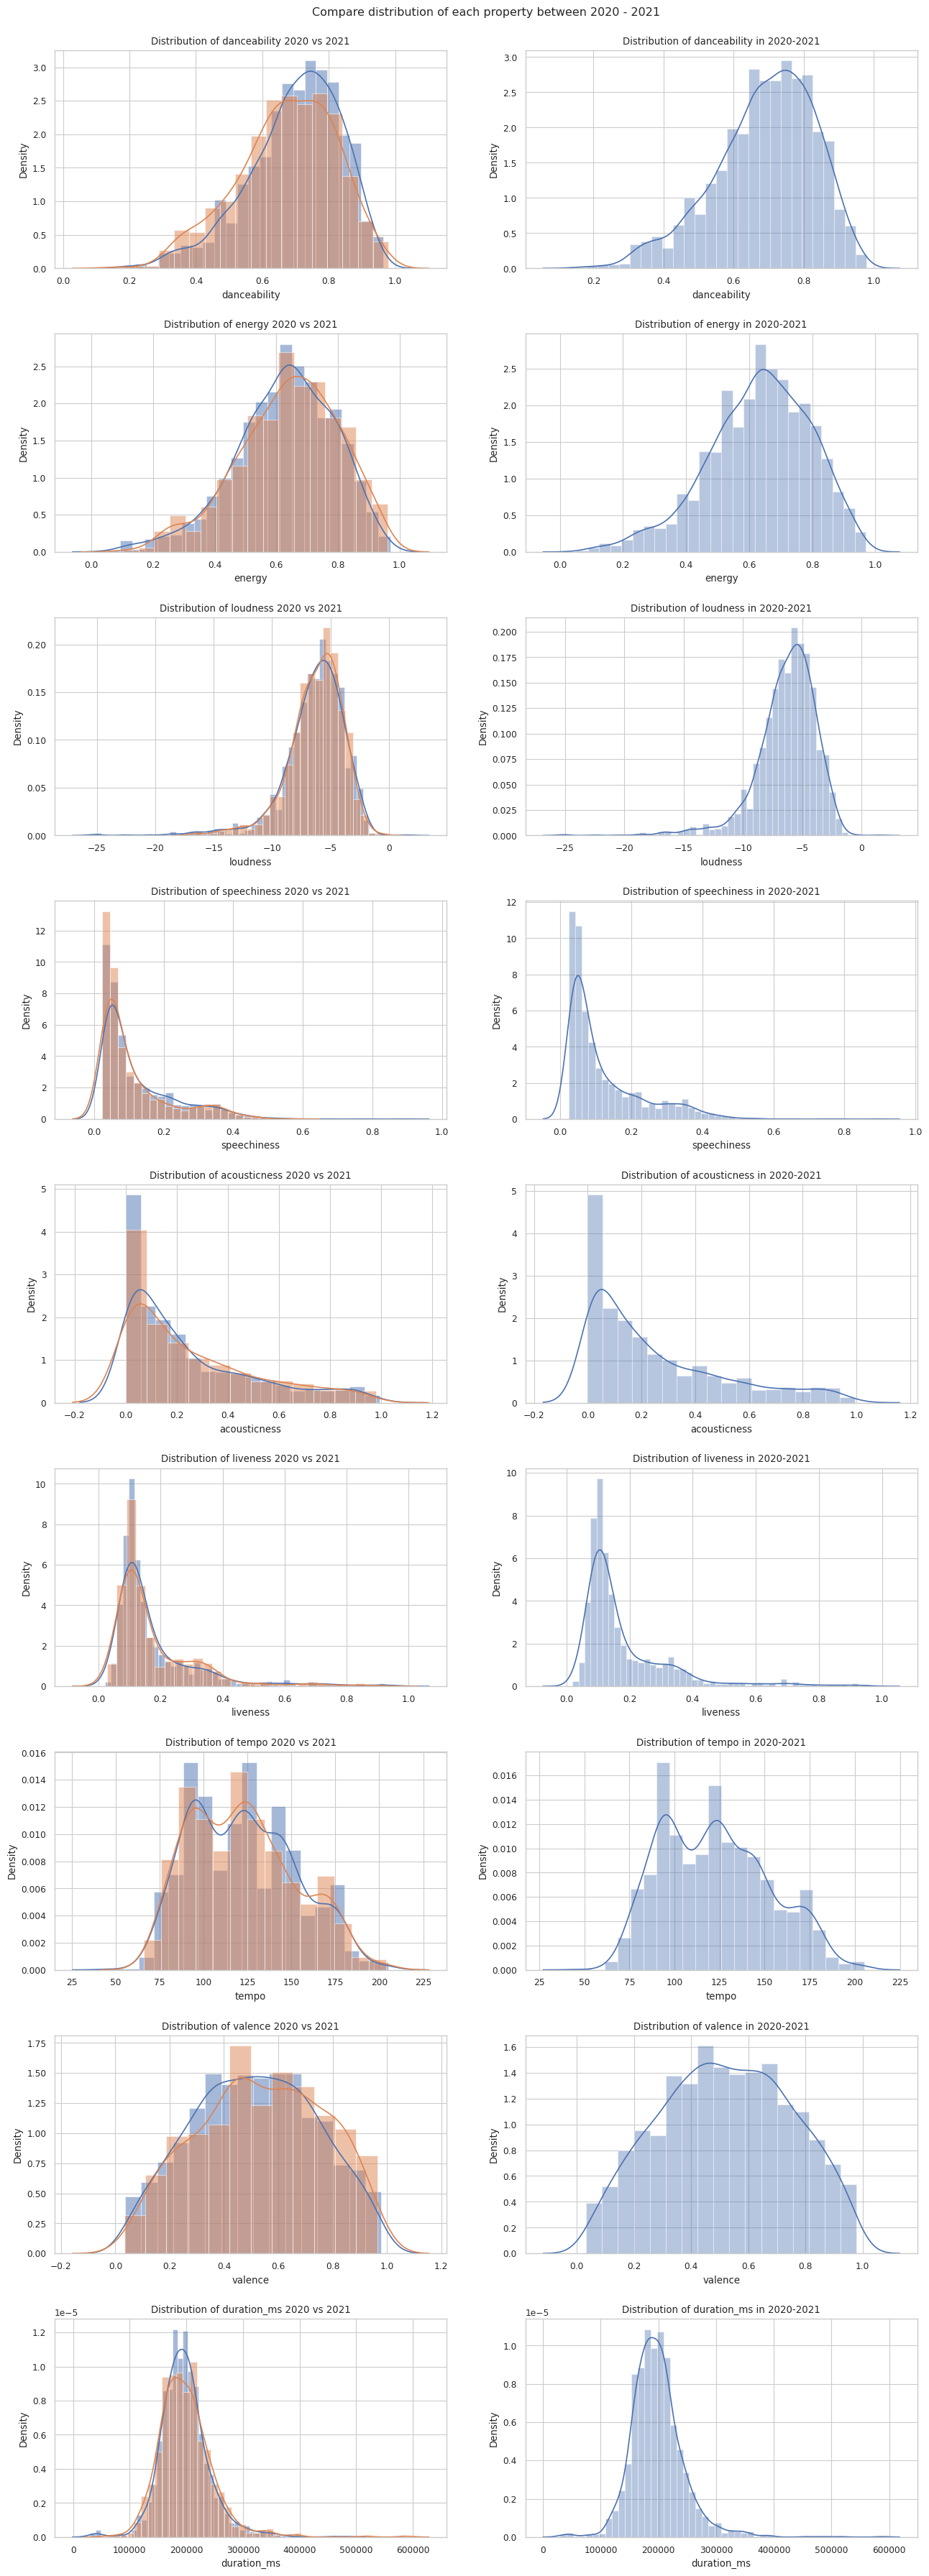

In [27]:
fig, axes = plt.subplots(9, 2, figsize=(15, 40))
properties = song_properties_df.columns[1:]
for p, ax in zip(properties, axes):
    sns.distplot(song_properties_byyear_df.loc[(song_properties_byyear_df.year.isin([2019, 2020])), p], hist_kws=dict(alpha=0.5), ax=ax[0])
    sns.distplot(song_properties_byyear_df.loc[(song_properties_byyear_df.year == 2021), p], hist_kws=dict(alpha=0.5), ax=ax[0])
    ax[0].title.set_text(f'Distribution of {p} 2020 vs 2021')
    sns.distplot(song_properties_byyear_df[p], ax=ax[1])
    ax[1].title.set_text(f'Distribution of {p} in 2020-2021')

fig.suptitle('Compare distribution of each property between 2020 - 2021')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.965,
                    wspace=0.2,
                    hspace=0.3)

plt.show()

- In general, properties distribution did not change between 2020 and 2021
- **Danceability** and **energy** property were high so music seem full of energy and suitable for dancing.
- **Loudness** tends to be from -10 to 0, it could be standard loud for human.
- **Speechiness** was low because people like listenning music more than audio books, talkshow, poetry,..
- **Liveness** was low which mean people prefer listen audio music to live version.
- **Accousticness** was also low because of development of technology, people like technical music than tradition instrument one.
- Because of highness of **Danceability** and **energy**, so **tempo** is high too.
- **Valence** property follow *normal distribution*, so human can love happy or depressing song depend on their emotion.
- Average **duration** of song is from 2-5 minutes.

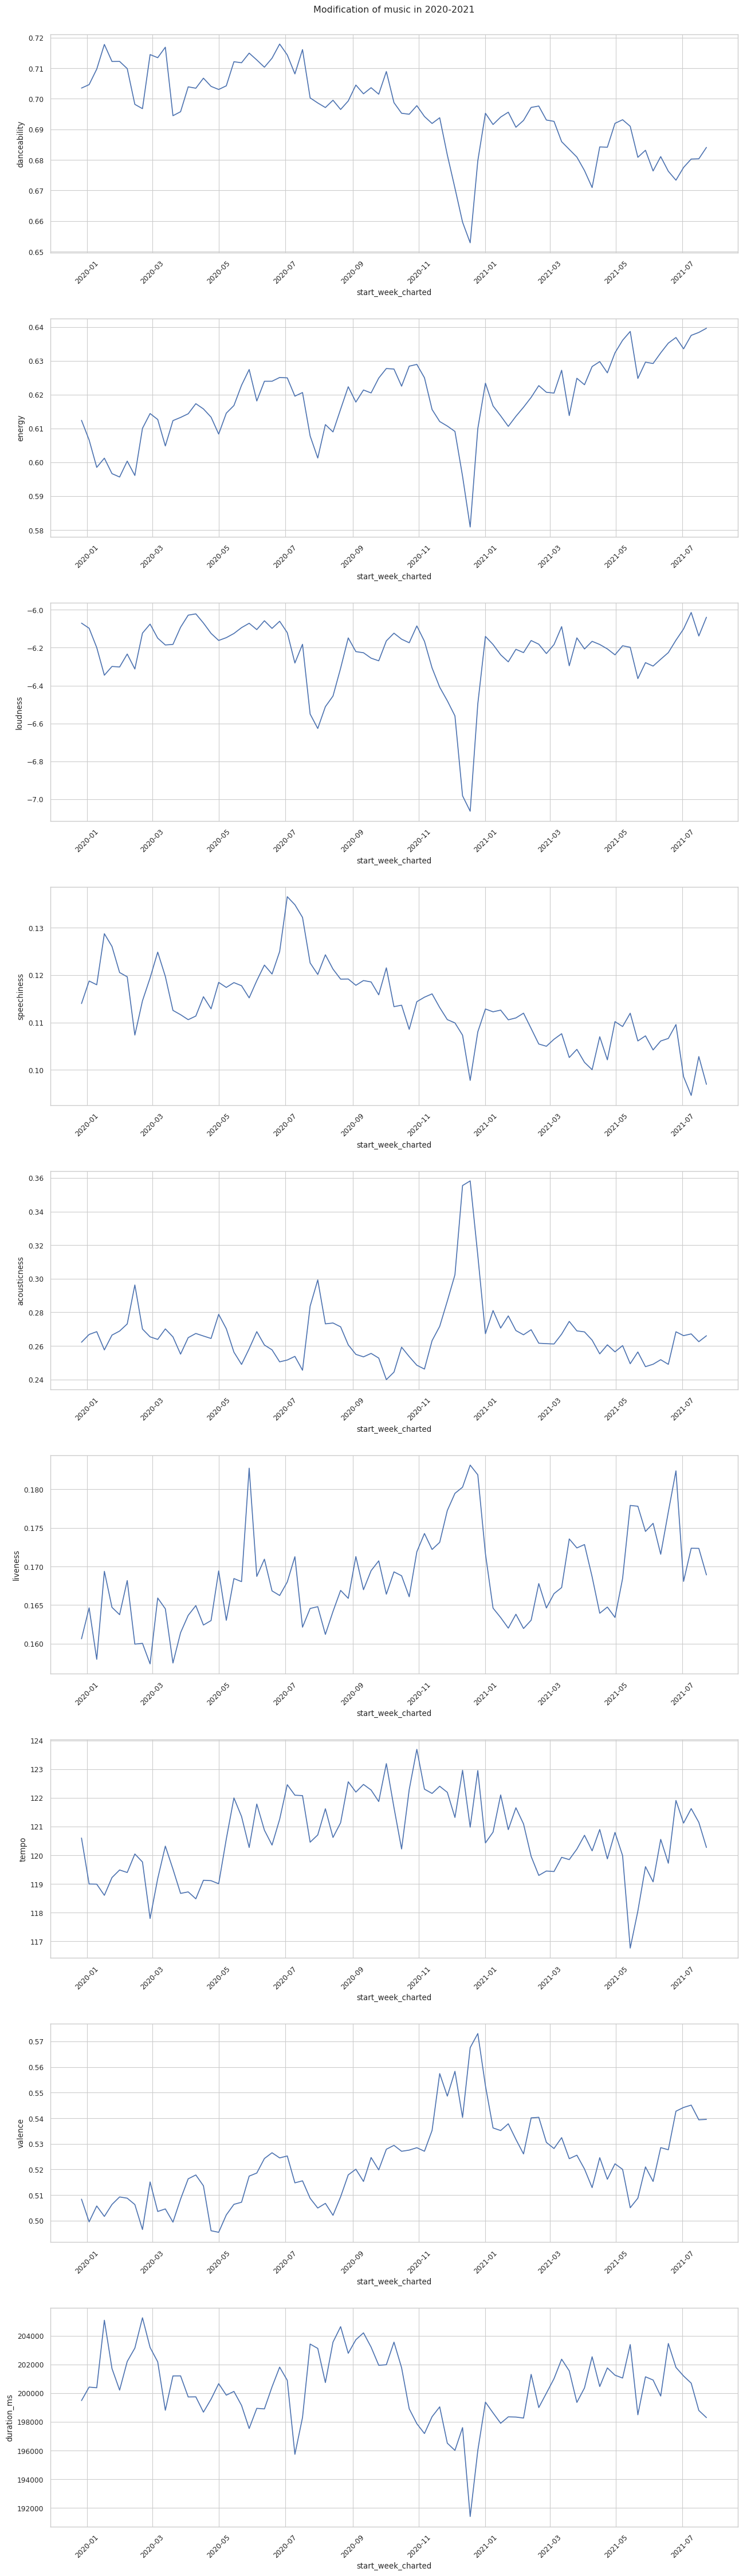

In [28]:
fig, axes = plt.subplots(9, 1, figsize=(15, 50))
fig.suptitle("Modification of music in 2020-2021")
for p, ax in zip(properties, axes):
    meanline = song_properties_byweek_df.groupby('start_week_charted', as_index=False)[p].mean()
    sns.lineplot(x=meanline.start_week_charted, y=meanline[p], ci=None, ax=ax)  
    ax.tick_params('x', labelrotation=45)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.97,
                    wspace=0.2,
                    hspace=0.3)

plt.show()

From above plots, we can conclude:
- Although **Danceability** decreased, **energy** increase during this duration. 
- **loudness** did not vary too much, it could be standard loud for a song.
- **speeechiness** inscreasingly from early 2020 which marked talk shows, audio books, tell story songs (in Covid-19 duration, music production interupted). However, after half of year, it descreased.
- **liveness** strongly increased in summer and winter season because it could be the good time to go performing (it could be the consequence of online music platform).
- **tempo**  was surpringly low in early 5 month of 2020 and back to normal level in 6 months later. However, it was low again!
- **valence** was higher than average a little bit but increased.
- **duration_ms** was like **loudness**, there were only 2 strongly decreasing period.
- **accousticness** was low in almost time but strongly increased in December. 
- There was a fact that almost properties declined in December except ***Accousticness***. It could be Christmas occasion whose songs ussally is created from instrument.

---
## Preprocessing for question 3
Before we answer the second question, we have to do something with "genre" columns for convenient analysis.

In [29]:
def extractMainGenre(x):
    listGenre = x[2:-2].split("', '")
    res = []
    for genre in listGenre:
        # befSize = len(res)
        if 'indie' not in res and (genre.find('indie') != -1 or genre.find('singer-songwriter') != -1):
            res.append('indie')
        if 'rock' not in res and (genre.find('rock') != -1):
            res.append('rock')
        if 'pop' not in res and (genre.find('pop') != -1):
            res.append('pop')
        if 'underground' not in res and (genre.find('hip hop') != -1 or genre.find('rap') != -1):
            res.append('underground')
        if 'latin' not in res and (genre.find('latin') != -1):
            res.append('latin')
        if 'r&b' not in res and (genre.find('r&b') != -1 or genre.find('soul') != -1):
            res.append('r&b')
        if 'dance' not in res and (genre.find('house') != -1 or genre.find('dance') != -1 or genre.find('techno') != -1):
            res.append('dance')
        if 'electro' not in res and (genre.find('edm') != -1 or genre.find('electro') != -1):
            res.append('electro')
        if 'country' not in res and (genre.find('country') != -1):
            res.append('country')
        if 'jazz' not in res and (genre.find('jazz') != -1 or genre.find('disco') != -1):
            res.append('jazz')
        
        # if len(res) != befSize and 'other' not in res:
        #     res.append('other')
    
    if len(res):
        return res
    else:
        return ['other']

df.genre = df.genre.apply(extractMainGenre)
trend_df = df.reindex(columns=['genre', 'popularity', 'streams']).explode('genre')

## Q3: What was music trend in this period?

Number of song in each genre in this period

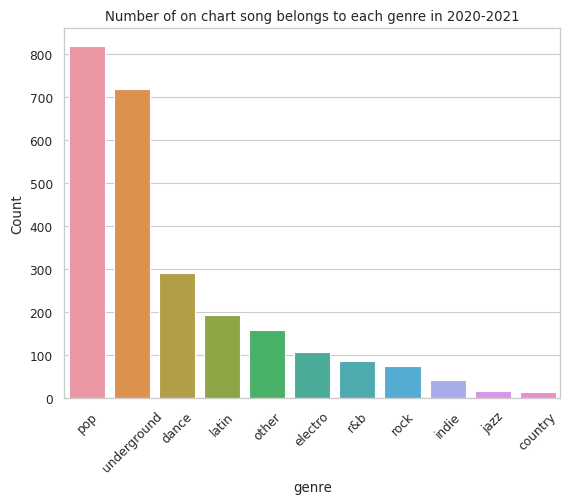

In [30]:
noSongs = trend_df.groupby('genre', as_index=False).size().sort_values('size', ascending=False)
sum_size = noSongs['size'].sum()
perChart = noSongs['size'].apply(lambda x: x/sum_size)
sns.barplot(data=noSongs, x='genre', y='size')
plt.xticks(rotation=45)
plt.title('Number of on chart song belongs to each genre in 2020-2021')
plt.ylabel('Count')
plt.show()

What genre is the most popular?

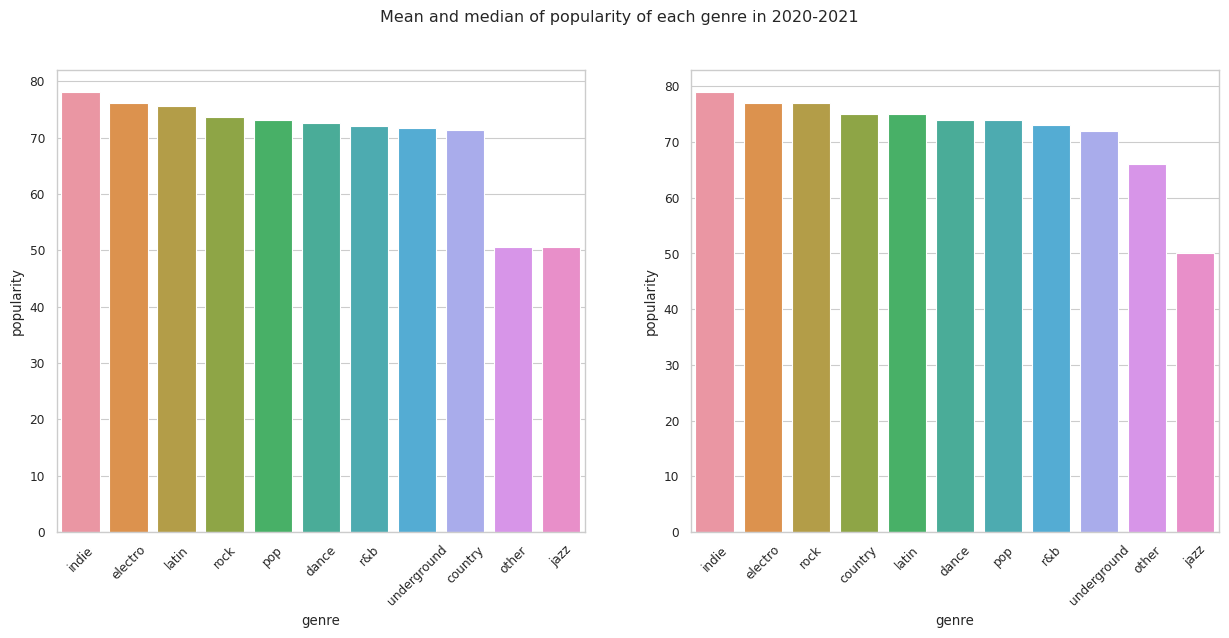

In [31]:
genreMeanPopular = trend_df.groupby('genre', as_index=False).popularity.mean().sort_values('popularity', ascending=False)
genreMedianPopular = trend_df.groupby('genre', as_index=False).popularity.median().sort_values('popularity', ascending=False)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=genreMeanPopular, x='genre', y='popularity', ax=ax0)
ax0.tick_params('x', labelrotation=45)

sns.barplot(data=genreMedianPopular, x='genre', y='popularity', ax=ax1)
ax1.tick_params('x', labelrotation=45)

fig.suptitle("Mean and median of popularity of each genre in 2020-2021")
plt.show()

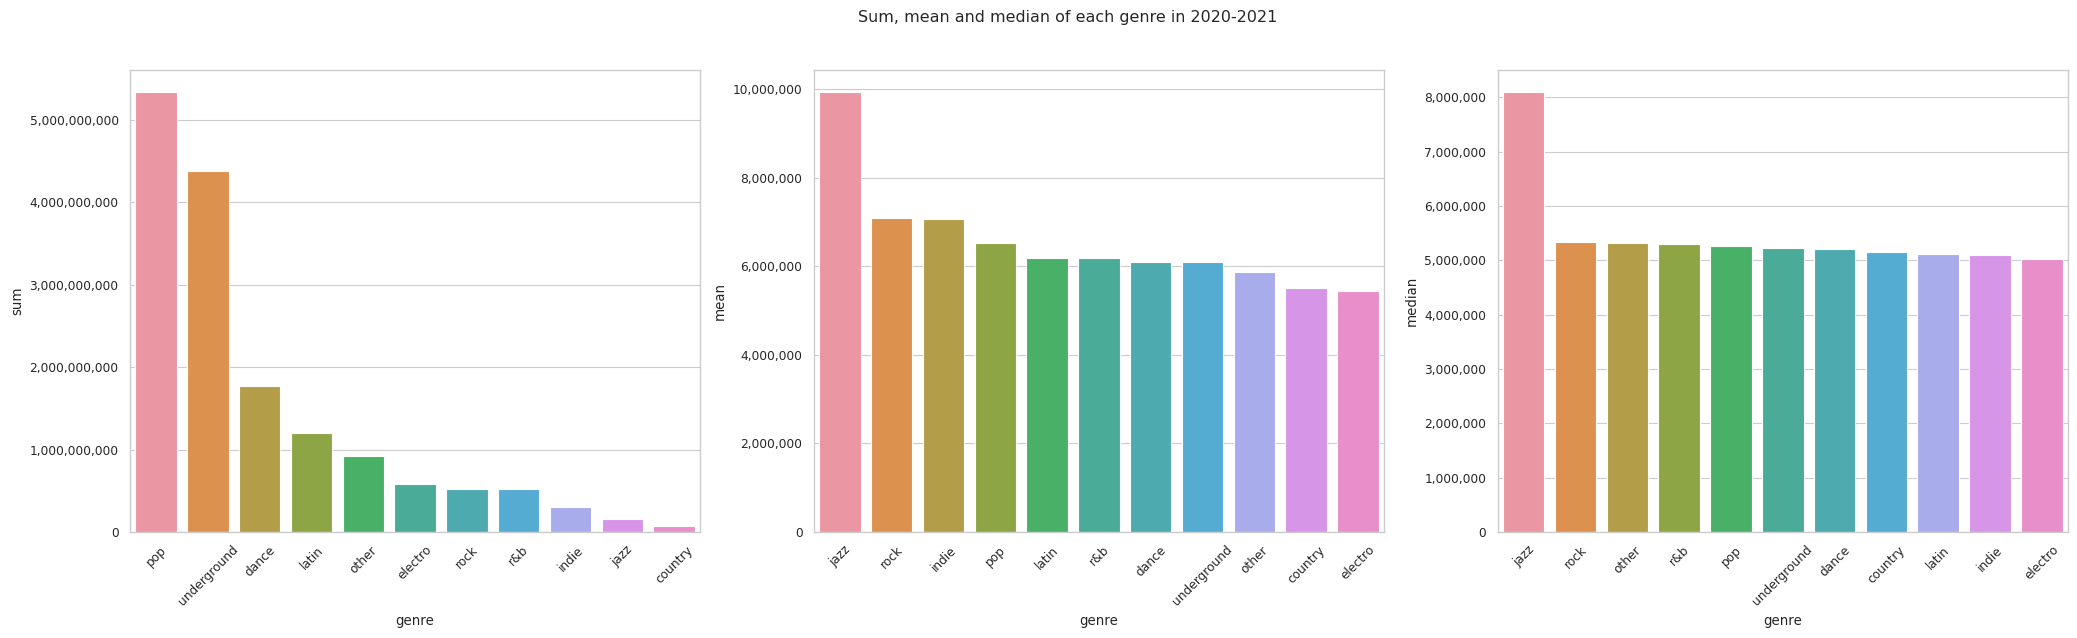

In [32]:
genreStream = trend_df.groupby('genre', as_index=False).streams.agg(['sum', 'mean', 'median'])

fig, axes = plt.subplots(1, 3, figsize=(25, 6))
for x, ax in zip(genreStream.columns, axes):
    sort_df = genreStream.sort_values(x, ascending=False)
    sns.barplot(x=sort_df.index, y=sort_df[x], ax=ax)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.tick_params('x', labelrotation=45)

plt.suptitle("Sum, mean and median of each genre in 2020-2021")
plt.show()

***Conclude***: 

- From the first plot, pop and underground are the most popular genre.
- Most songs are go on this chart, so genres's popularity measurement are approximated.
- If we want our music to be popular with masses, we should produce production with indie, electro, latin, rock, pop, dance, r&b, underground, country genre.
- More than popularity, if we want our music have many stream, we should give a priority to pop.
- Deѕpite pop is genre has most stream, it is still double-edged sword. There is a fact that average stream per songs is not as high as our expectation but the highest is jazz. Although jazz is not as popular as pop, it are old long life genre (it's not gotten bored quickly like pop) and still have its fan overtime. Therefore, let choose jazz if you want your music to be timeless.

---
## Q4: Top artist and music in each genre

We will get top artist and music in each genre have the most stream.

In [33]:
explode_genre = df.explode('genre')

#sequence get top artists and songs base on stream
artists_each_genre = explode_genre.groupby(['artist','genre'])['streams'].sum().reset_index()
sort_artist_each_genre = artists_each_genre.sort_values(['genre','streams'],ascending = False)
top_artist_each_genre = sort_artist_each_genre.groupby('genre')['genre','artist','streams'].head(10)

songs_each_genre = explode_genre.groupby(['song_id','song_name','genre'])['streams'].sum().reset_index()
sort_song_each_genre = songs_each_genre.sort_values(['genre','streams'],ascending = False)
top_song_each_genre = sort_song_each_genre.groupby('genre')['genre','song_id','song_name','streams'].head(10)

- Top 10 artists each genre

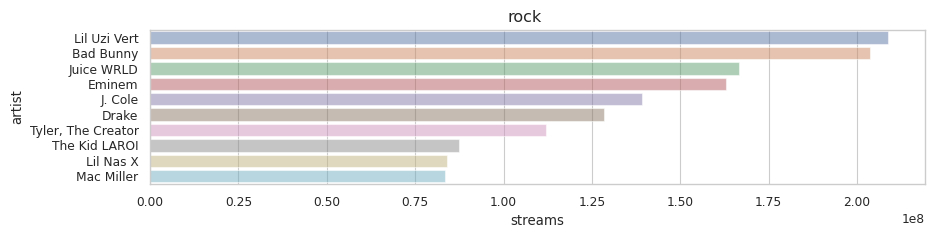

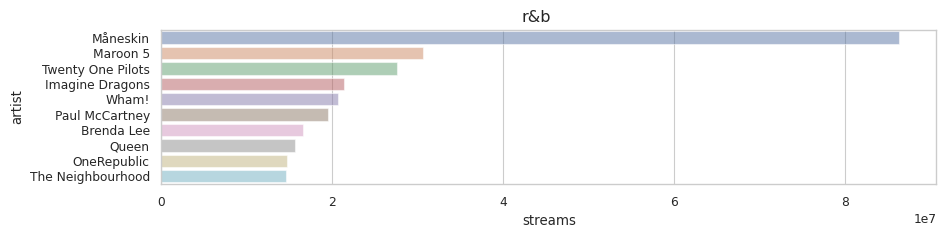

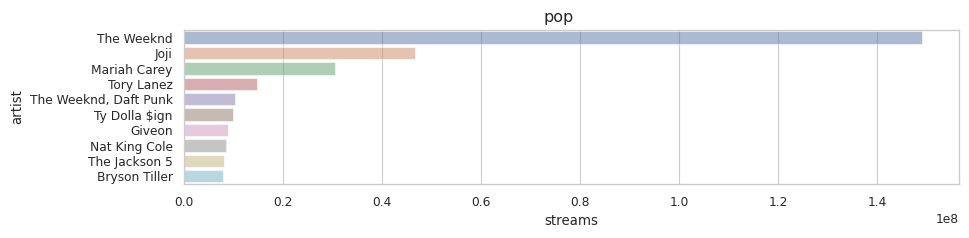

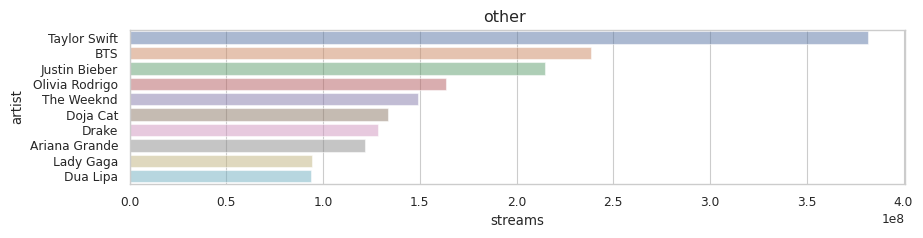

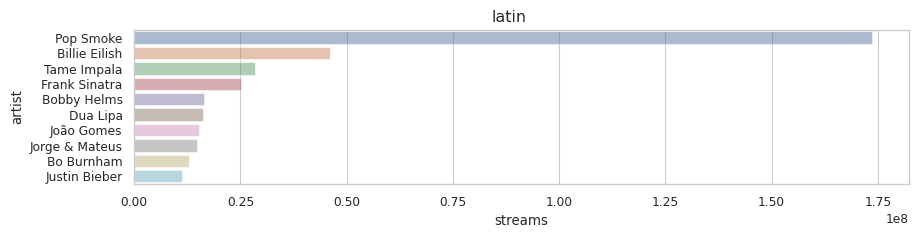

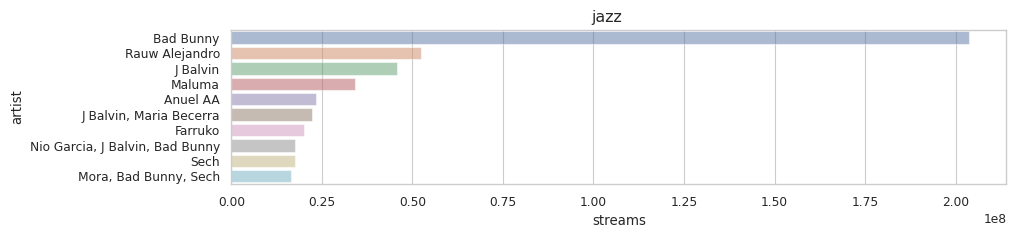

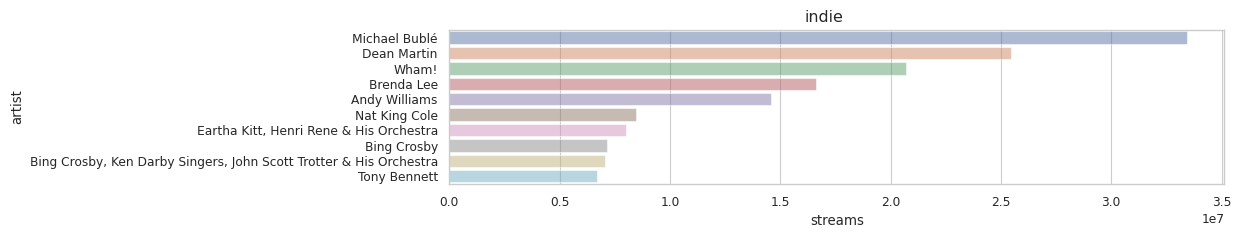

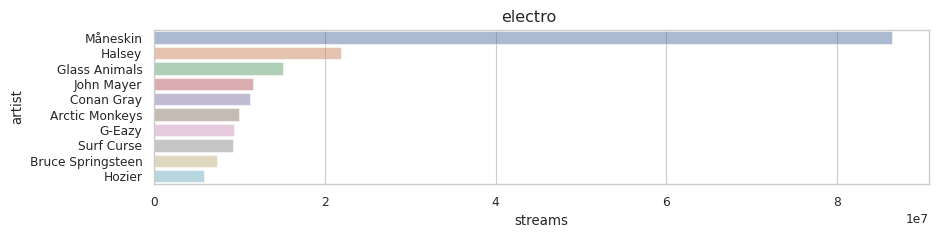

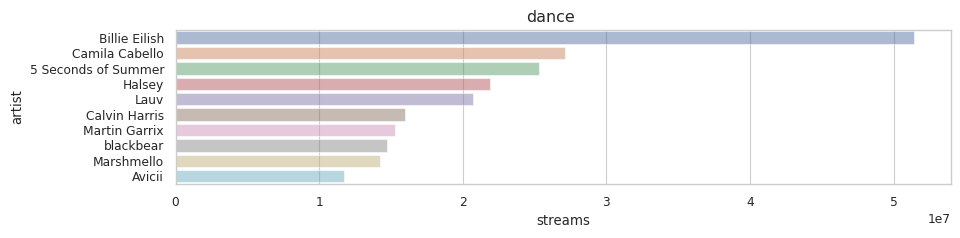

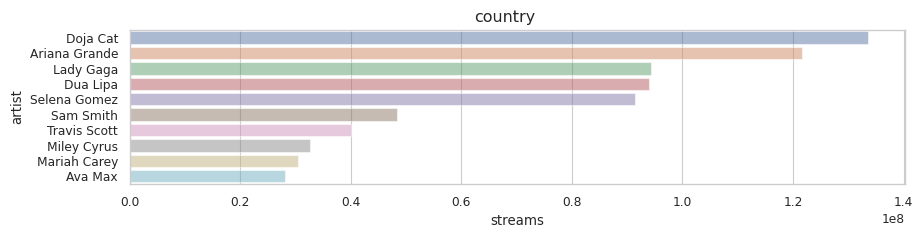

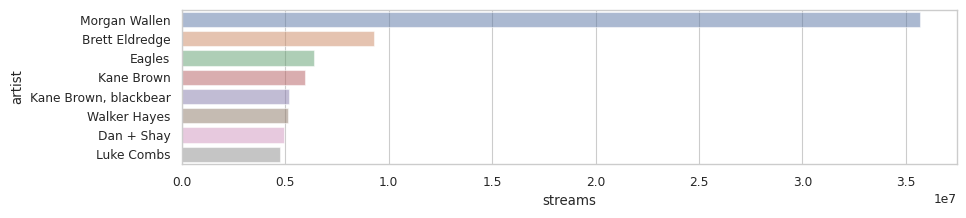

In [34]:
genres = top_artist_each_genre['genre'].unique()

for g in genres:
    fig.suptitle(f"{g}")
    fig, ax = plt.subplots(figsize = (10,2))
    ax = sns.barplot(data=top_artist_each_genre[top_artist_each_genre['genre'] == g], x='streams', y = 'artist',alpha=0.5, log=False)

- Top 10 songs each genre

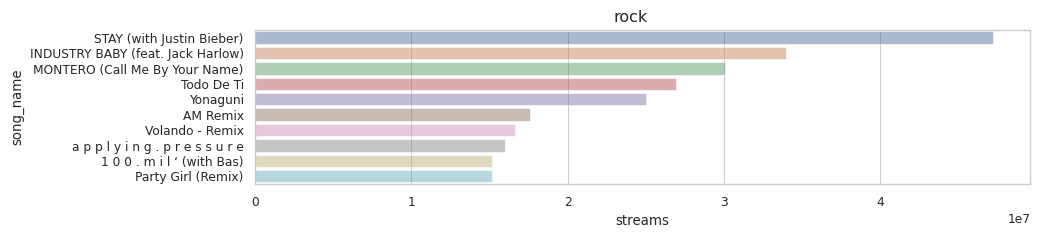

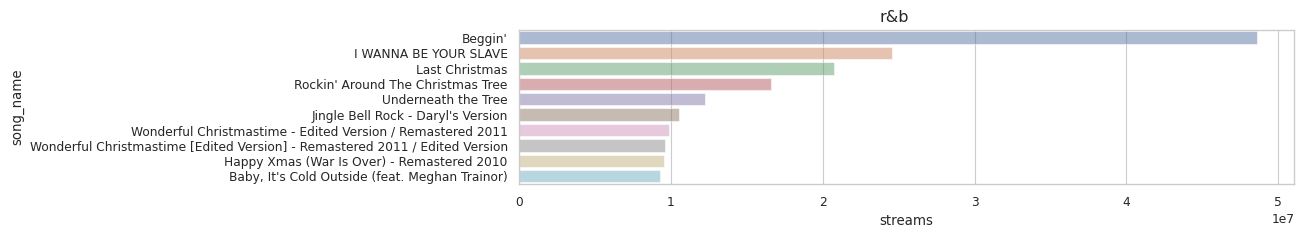

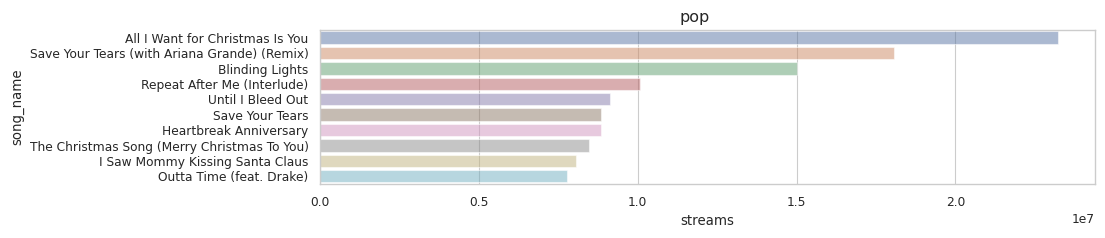

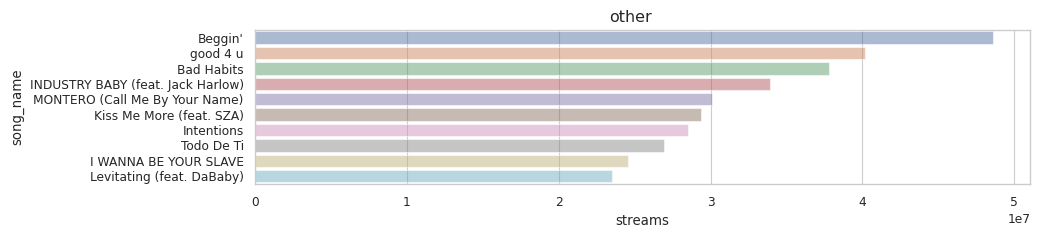

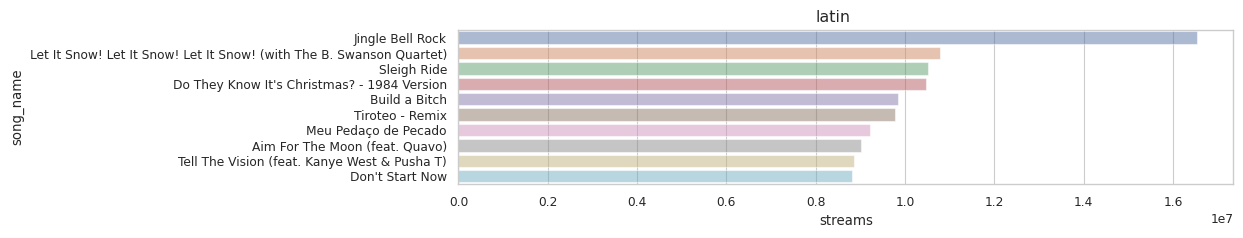

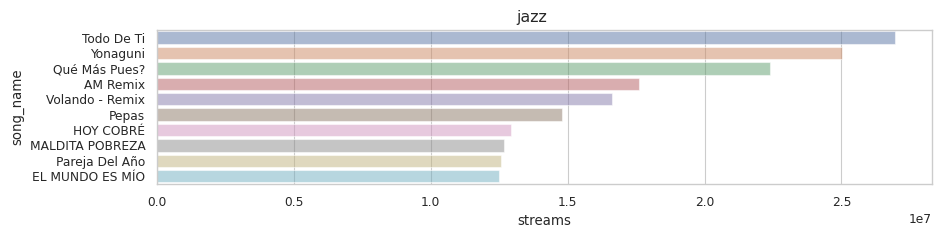

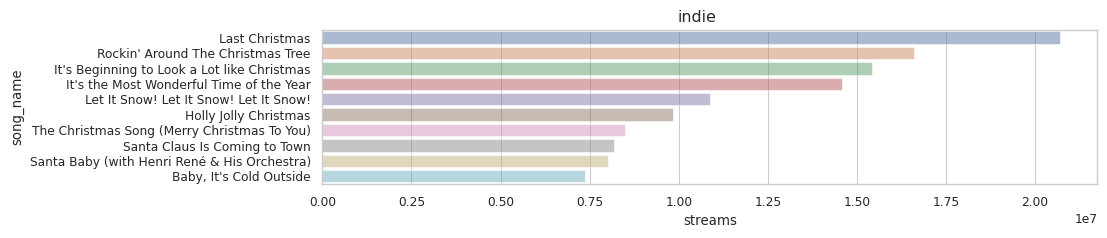

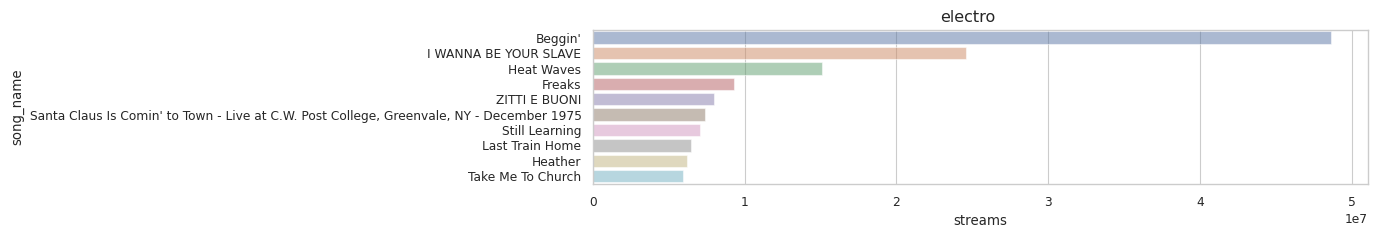

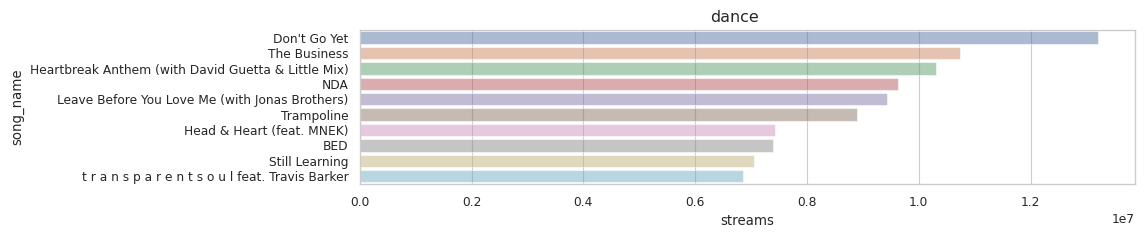

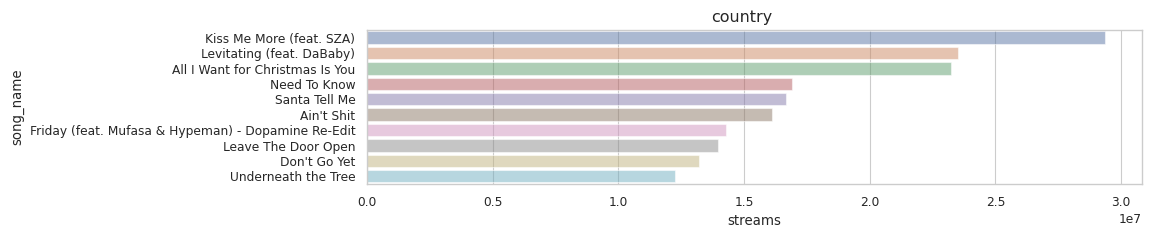

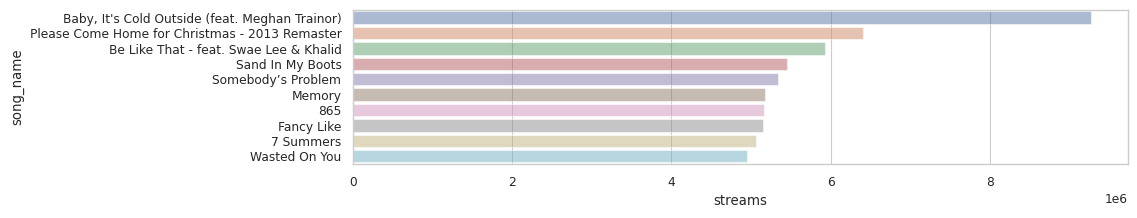

In [35]:
genres = top_song_each_genre['genre'].unique()

for g in genres:
    fig.suptitle(f"{g}")
    fig, ax = plt.subplots(figsize = (10,2))
    ax = sns.barplot(data=top_song_each_genre[top_song_each_genre['genre'] == g], x='streams', y = 'song_name',alpha=0.5, log=False)

---
## Q5: Which is better, a solo artist or collab artists ?

Getting songs have multiple artists and single artist. Then compare about proportion, mean of popularity and sum of stream between two segments.

In [36]:
#recognize a song has more than one artist
index = df['song_name'].str.contains('(with)|(feat.)',na=False,regex =True) | df['artist'].str.contains(',')

#get songs have multi artists
multi_artists = df[index]
multi_artists.drop_duplicates('song_id', inplace=True)

#get songs have solo artist
solo_artist = df[~index]
solo_artist.drop_duplicates('song_id', inplace=True)

**Proportion**

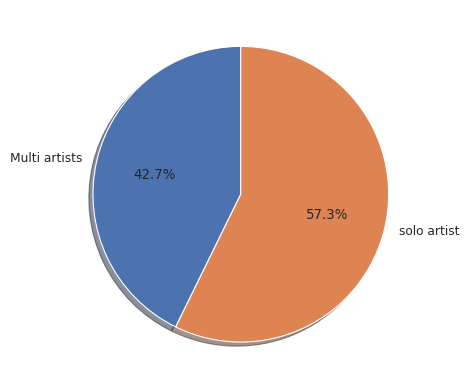

In [37]:
labels = ['Multi artists', 'solo artist']
size = [len(multi_artists),len(solo_artist)]
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

Number of solo artist songs in top chart larger than multi artists songs. 

**Mean of popularity**

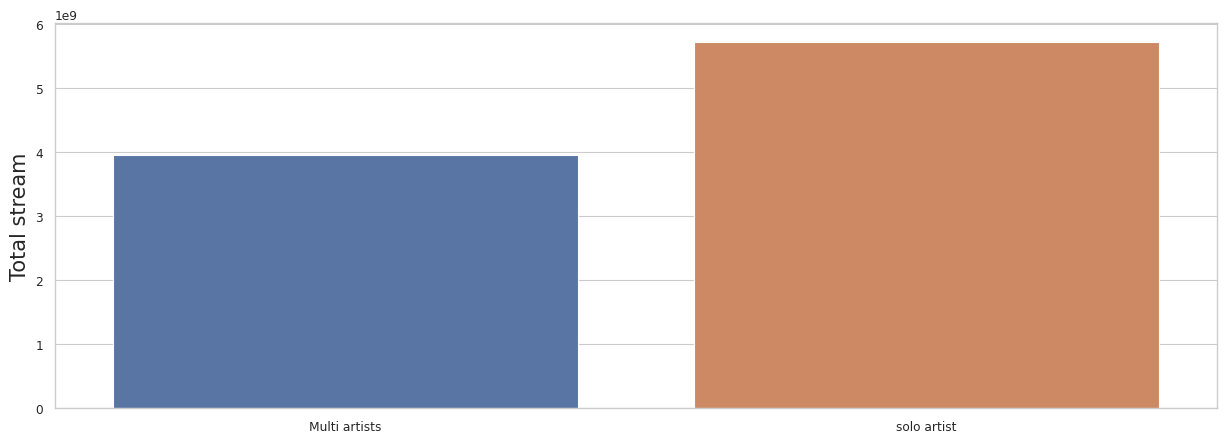

In [38]:
plt.figure(figsize=(15,5))
streams_size = [multi_artists['streams'].sum(),solo_artist['streams'].sum()]

sns.barplot(x=labels, y=streams_size)
plt.ylabel("Total stream", fontsize=15)
plt.show()

**Total of stream**

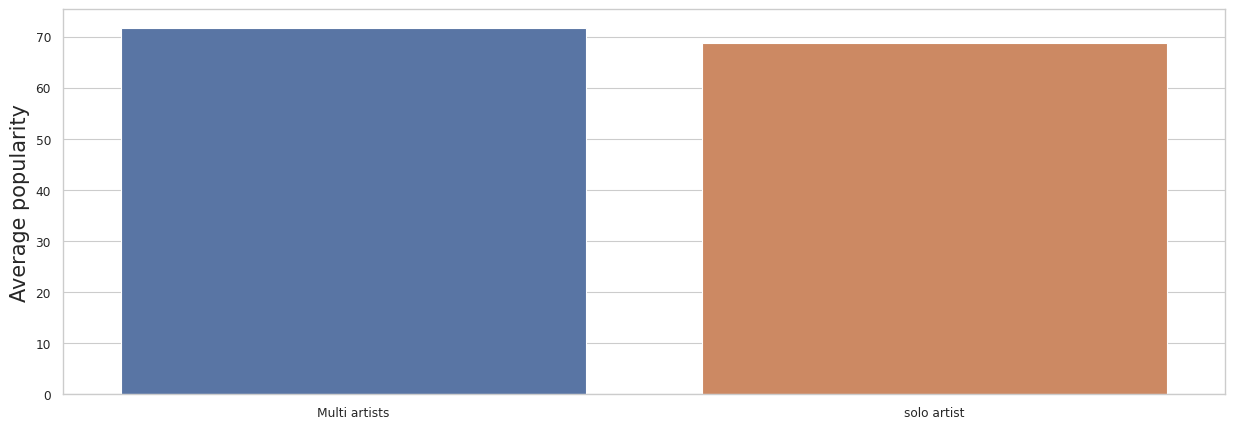

In [39]:
plt.figure(figsize=(15,5))
popularity_size = [multi_artists['popularity'].mean(),solo_artist['popularity'].mean()]

sns.barplot(x=labels, y=popularity_size)
plt.ylabel("Average popularity", fontsize=15)
plt.show()

Multi artists songs are a little bit better solo artists songs at popularity.

**Conclude**: 

- People prefer listening solo artist songs than multi artists songs. This may be solo artists don’t have to share the spotlight with anyone. In collaboration, people may unlike some artists despite having their favorite artist in it.
- Multi artists song have a little bit more popular. Because of gathering many stars who have many fans, it's help them have more shows to present together. They also make up a new music with combination of many features of each artist in collaboration

**Objective**:
- Support artist to have a decision about collab with other artist 

# 5. Reflection

**Trung**

- Face difficulties:
    - We have some trouble in early time when we find the dataset.
    - I took a long time to understand about features of music.
    - It's not easy to find a meaningful question. I tried a lot of questions and didn't use most of them; cuz they are too easy to answer, results are not special or useful, lack of data.
    - Conflict on github because git store note book file as JSON format due to hard for merge.
- Obtain:
    - Comprehend process and impove skills of a data scientist
    - Working on team efficiently
    - Resolve conflict on git
    - Understand the value and importance of the knowledge domain in data analysis.
   
**Phuong**

- Face difficulties:
    - We have some trouble in early time when we find the dataset.
    - It's hard to choose which chart is suitable
    - Look at visualized data and see the meaning of it
- Obtain:
    - Comprehend process and impove skills of a data scientist
    - Working on team efficiently
    - Resolve conflict on git
    - Understand the value and importance of the knowledge domain in data analysis.

**If we have more time?**
- Analyse more about dataset have all music in 2020 - 2021 in order to verify above our conclude.
- Apply machine learning model to answer deeper questions 

# 6. Reference

- [Exploring spotify data](https://www.kaggle.com/code/gleblevankov/exploring-spotify-data)
- [spotify music analysis](https://www.kaggle.com/code/aeryan/spotify-music-analysis)
- [When to Use Mean vs. Median (With Examples)](https://www.statology.org/when-to-use-mean-vs-median/#:~:text=It's%20best%20to%20use%20the%20mean%20when%20the%20distribution%20of,when%20there%20are%20clear%20outliers.)
- Some [api](https://pandas.pydata.org/docs/reference/)